In [2]:
import pandas as pd
diabetes = pd.read_csv('diabetes_HW4_Q1_Dataset.csv')

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [25]:
balance_data = pd.read_csv('diabetes_HW4_Q1_Dataset.csv', sep=',', header=0)
print("Dataset Length: ", len(balance_data))
print("Dataset Shape: ", balance_data.shape)
print("Dataset: ", balance_data.head())

Dataset Length:  768
Dataset Shape:  (768, 9)
Dataset:     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [27]:
balance_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [36]:
# Randomly sampling 80% of each dataset and save them in a training dataset and saving the remaining 20% of each dataset
X = balance_data.iloc[:, 0:8]
Y = balance_data.iloc[:, 8]

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=100)

In [40]:
# 6. Train the model using Gini index
clf_gini = DecisionTreeClassifier(criterion="gini",
                                      random_state=100, max_depth=5, min_samples_leaf=7)

clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=7, random_state=100)

In [42]:
y_pred = clf_gini.predict(X_test)
print("Predicted values:")
print(y_pred)

print("Confusion Matrix: ",
      confusion_matrix(y_test, y_pred))
print("Accuracy : ",
      accuracy_score(y_test, y_pred)*100)
print("Report : ",
      classification_report(y_test, y_pred))

Predicted values:
[0 0 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0
 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0]
Confusion Matrix:  [[84 17]
 [27 26]]
Accuracy :  71.42857142857143
Report :                precision    recall  f1-score   support

           0       0.76      0.83      0.79       101
           1       0.60      0.49      0.54        53

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.71       154



In [48]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", 
                                        random_state = 100, max_depth=5, min_samples_leaf=7)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=7,
                       random_state=100)

In [52]:
#data['time'] = pd.to_datetime(data['time'], format='%H:%M:%S')

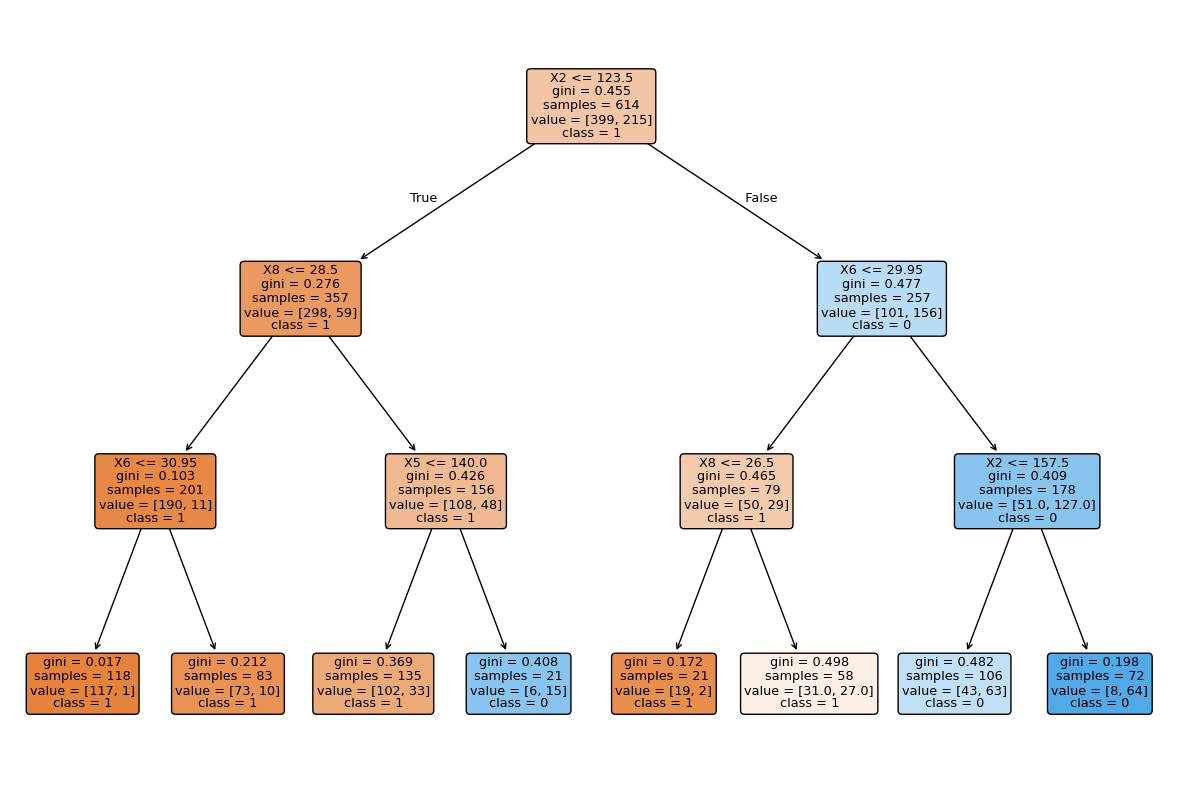

In [60]:
from sklearn import tree
from sklearn.tree import plot_tree


feature_names=['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']
class_names=['1', '0']

plt.figure(figsize=(15, 10))
plot_tree(clf_gini, filled=True, feature_names=feature_names, class_names=class_names, rounded=True)
plt.show()